# Zadani (reformulovano z pameti :d):

- Vygenerujte dve distribuce, ktere pujdou lepe separovat QDA,
nez logistickou regresi.

- Rozdelte data na trenovaci a testovaci mnozinu.
- Porovnejte presnost obou metod a ukazte, ze QDA skutecne funguje lepe.

Time limit bylo 30 minut.

# Reseni
- Napad je ten ze logisticka regrese deli data linearni hranici a QDA parabolou.
- Tedy potrebujeme datset, kde bude optimalni klasifikator parabola.
- Takove distribuce vyrobime tim, ze jejich sigmy budou ruzne.

In [ ]:
library(MASS)
library(tidyverse)

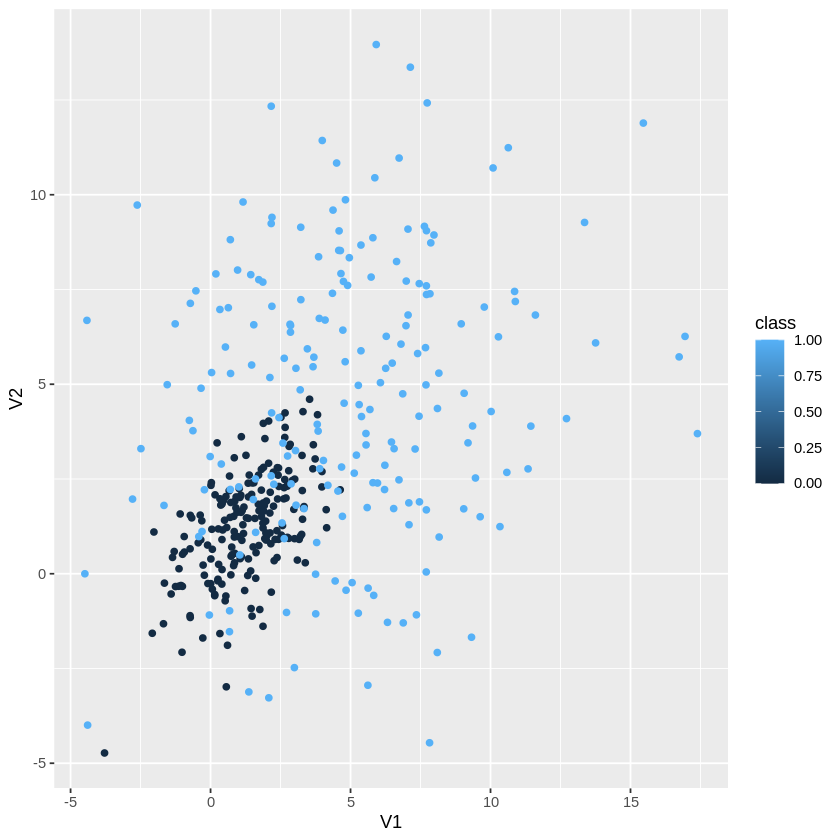

In [ ]:
num_samples = 200

# Parameters for distribution 1
mu1 = c(1,1)

sigma1 <- matrix(nrow = 2, ncol = 2)
sigma1[1, 1] <- 2
sigma1[2, 2] <- 2
sigma1 [1, 2] <- 1
sigma1 [2, 1] <- 1

# Parameters for distribution 2
mu2 = c(5,5)

sigma2 <- matrix(nrow = 2, ncol = 2)
sigma2[1, 1] <- 14
sigma2[2, 2] <- 14
sigma2 [1, 2] <- 6
sigma2 [2, 1] <- 1

# Generate samples
samples1 <- mvrnorm(n = num_samples, mu = mu1, Sigma = sigma1)
samples2 <- mvrnorm(n = num_samples, mu = mu2, Sigma = sigma2)

# Create dataframes from samples and assign labels
data1 <- as.data.frame(samples1)
data1$class <- 0

data2 <- as.data.frame(samples2)
data2$class <- 1

dataset <- rbind(data1, data2)

# Plot the dataset
ggplot(dataset, aes(x = V1, y = V2, col = class)) +
geom_point()

In [ ]:
# Train, test split (70:30)
sample <- sample(c(TRUE, FALSE), nrow(dataset), replace=TRUE, prob=c(0.3,0.7))
train <- dataset[sample, ]
test <- dataset[!sample, ]

In [ ]:
# Train models on train set
model_logreg <- glm(class ~ ., family = binomial, data = train)
model_qda <- qda(class ~ ., data=train)

# Get predictions on test set
predicted_logreg <- round(predict(model_logreg, test, type = "response"))
predicted_qda <- predict(model_qda, test)

In [ ]:
# Print results
sprintf("accuracy logreg %.3f", mean(predicted_logreg == test$class))
sprintf("accuracy qda %.3f", mean(predicted_qda$class == test$class))

[1] "accuracy logreg 0.803"

[1] "accuracy qda 0.884"